In [1]:
import pandas as pd
import io
import requests
import time
api = "d71297b987d24d278f3b135aace13402"
api2 = "NCLZBG1JEQAZ21UQ"
ticker = "AAPL"
start_date = "2018-01-01"
interval = "daily"
combined_df = pd.DataFrame()

In [2]:
def alpha_timeseries(symbol,start_date,apikey,):
  url="https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol="+symbol+"&outputsize=full&apikey="+apikey+"&datatype=csv"
  s=requests.get(url).content
  df=pd.read_csv(io.StringIO(s.decode('utf-8')))
  df = df.set_index('timestamp')
  df = df.sort_index()
  df = df.loc[start_date:]
  return df

In [3]:

ticker_stock  = "AAPL""SPY","GOOG","TSM","NVDA","MSFT","PYPL","VGT","AMZN","IBM","NFLX","HPQ","SONY","DELL"

In [4]:

ticker_stock  = "AAPL"

In [5]:
tickers_df = alpha_timeseries(ticker_stock,start_date,api)

In [6]:
combined_df = alpha_timeseries(ticker,start_date,api)

<AxesSubplot:xlabel='timestamp'>

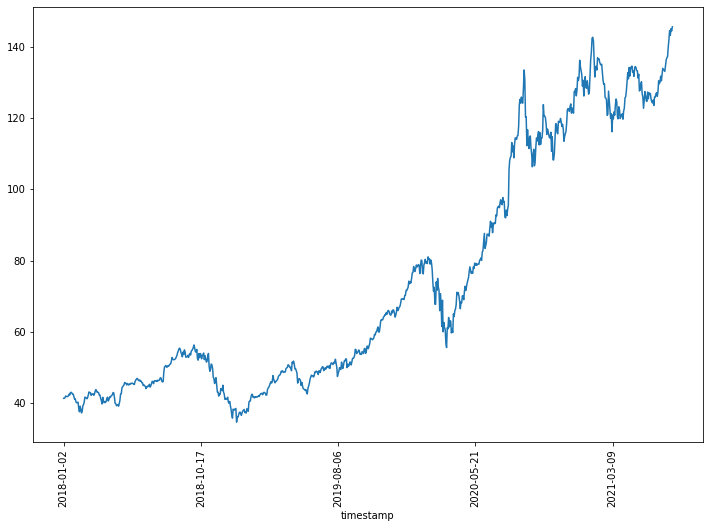

In [7]:
combined_df['adjusted_close'].plot(rot=90,figsize=(12,8))

In [8]:
def alpha_convert(symbol,start_date,function,time_period,apikey,interval):
  url = 'https://www.alphavantage.co/query?function='+function+'&symbol='+symbol+'&interval='+interval+'&time_period='+time_period+'&series_type=close&apikey='+apikey
  index_name = "timestamp"
  df = pd.read_json(url)
  df  = df.iloc[10:]
  df  = df.sort_index()
  df = df.loc[start_date:]
  df_list = df.index.values.tolist()
  column_name = "Technical Analysis: "+ function
  df = pd.DataFrame(df[column_name].to_list())
  df.index = df_list
  df.index.name = "timestamp"
  for columns in df.columns:
    df[columns] = pd.to_numeric(df[columns], downcast="float")
    df = df.rename(columns={columns: columns+" "+time_period})
  return df

In [9]:
sma20 = alpha_convert(ticker,start_date,"SMA","20",api,interval)
combined_df = pd.concat([combined_df, sma20], axis=1, join="inner")

In [10]:
sma10 = alpha_convert(ticker,start_date,"SMA","10",api,interval)
combined_df = pd.concat([combined_df, sma10], axis=1, join="inner")

In [11]:
ema20 = alpha_convert(ticker,start_date,"EMA","20",api,interval)
combined_df = pd.concat([combined_df, ema20], axis=1, join="inner")

In [12]:
ema10 = alpha_convert(ticker,start_date,"EMA","10",api,interval)
combined_df = pd.concat([combined_df, ema10], axis=1, join="inner")

In [13]:
combined_df

,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,SMA 20,SMA 10,EMA 20,EMA 10
timestamp,,,,,,,,,,,,
2018-01-02,170.160,172.30,169.260,172.26,41.308268,25048048,0.0,1.0,41.234402,41.463402,41.230499,41.231400
2018-01-03,172.530,174.55,171.960,172.23,41.301074,28819653,0.0,1.0,41.263500,41.362900,41.237202,41.243999
2018-01-04,172.540,173.47,172.080,173.03,41.492916,22211345,0.0,1.0,41.304199,41.326698,41.261600,41.289299
2018-01-05,173.440,175.37,173.050,175.00,41.965325,23016177,0.0,1.0,41.375999,41.342300,41.328602,41.412201
2018-01-08,174.350,175.61,173.930,174.35,41.809454,20134092,0.0,1.0,41.436298,41.326500,41.374401,41.484402
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-01,136.600,137.33,135.760,137.27,137.270000,52485781,0.0,1.0,131.173996,134.229996,132.195694,134.381607
2021-07-02,137.900,140.00,137.745,139.96,139.960000,78945572,0.0,1.0,131.877502,135.179993,132.935104,135.395905
2021-07-06,140.070,143.15,140.070,142.02,142.020000,108181793,0.0,1.0,132.683502,136.151993,133.800400,136.600296


In [14]:

BBANDS20 = alpha_convert(ticker,start_date,"BBANDS","20",api2,interval)
combined_df = pd.concat([combined_df, BBANDS20], axis=1, join="inner")

ValueError: If using all scalar values, you must pass an index

In [ ]:
MACD20 = alpha_convert(ticker,start_date,"MACD","20",api2,interval)
combined_df = pd.concat([combined_df, MACD20], axis=1, join="inner")

In [ ]:
RSI20 = alpha_convert(ticker,start_date,"RSI","20",api2,interval)
combined_df = pd.concat([combined_df, RSI20], axis=1, join="inner")

In [ ]:
combined_df

In [ ]:
plot_list = combined_df.columns.to_list()[4:5]
plot_list = plot_list + combined_df.columns.to_list()[8:]
plot_list

In [ ]:
combined_df[plot_list].plot(figsize=(18,8),rot=75)

In [ ]:
from datetime import date,datetime
today = date.today()

In [ ]:
file_date = str(today)

In [ ]:
file_date

In [ ]:
combined_df.to_csv('df_'+file_date+'.csv')

In [ ]:
now = str(datetime.now())

In [ ]:
now

In [ ]:
combined_df.to_csv('df_'+now+'.csv')